# Modeling - Jamila

### Install modules

### Import Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sns
import pingouin
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

### Download Files

In [5]:
endorsements_2019_updated = pd.read_csv('data/endorsements_2019_updated.csv')
endorsements_2019_updated.head(2)

,Player,Endorsment (millions),Twitter Followers (millions),Min Estimated cost/ post,Max Estimated cost/ post,Avg Estimated cost/ post,estimated value per post,Value to cost,Team,Division,Age,Win_shares,Games,Minutes_played,Field_goal_percentage,Shooting_percentage,Draft Year,Tenure (Years),Draft Round,Overall Draft Pick
0,Lebron James,53.0,44.3,"900,000","1,250,000","1,075,000",470356,0.437540,Lakers,Pacific,36.0,5.6,45.0,1504.0,0.513,0.602,2003,18,1,1
1,Kevin Durant,35.0,17.9,67500,93750,"80,625",190464,2.362344,Brooklyn Nets,Atlantic,32.0,5.0,35.0,1157.0,0.537,0.666,2007,14,1,2


In [6]:
endorsements_2019_updated.columns

Index(['Player', 'Endorsment (millions)', 'Twitter Followers (millions)',
       'Min Estimated cost/ post', 'Max Estimated cost/ post',
       'Avg Estimated cost/ post', 'estimated value per post', 'Value to cost',
       'Team', 'Division', 'Age', 'Win_shares', 'Games', 'Minutes_played',
       'Field_goal_percentage', 'Shooting_percentage', 'Draft Year',
       'Tenure (Years)', 'Draft Round', 'Overall Draft Pick'],
      dtype='object')

In [7]:
player_2020_2021_stats_updated = pd.read_csv('data/player_2020_2021_count_fg_stats_social_media_csv.csv')
player_2020_2021_stats_updated.head(2)

,Player,Sponsorship,Industry,Subindustry,FG%,Index,Team Code,Twitter Followers,Twitter Followers (number),Twitter Posts (Past 30 days),...,PTS,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
0,Yogi Ferrell,NaN,NaN,NaN,0.381,155,CLE,NaN,NaN,NaN,...,19,0.075000,0.100000,0.175000,0.125000,0.075000,0.025000,0.075000,0.100000,0.475000
1,Victor Oladipo,6.0,6.0,6.0,0.407,384,HOU,318.68K,318680.0,8.0,...,424,0.011958,0.130045,0.142003,0.147982,0.035874,0.014948,0.076233,0.067265,0.633782


In [8]:
player_2020_2021_stats_updated.columns

Index(['Player', 'Sponsorship', 'Industry', 'Subindustry', 'FG%', 'Index',
       'Team Code', 'Twitter Followers', 'Twitter Followers (number)',
       'Twitter Posts (Past 30 days)', 'Twitter Interactions (Past 30 days)',
       'Twitter Interactions (Past 30 days) Number', 'Instagram Followers',
       'Instagram Presence (number)', 'Instagram Posts (Past 30 Days)',
       'Instagram Interactions (Past 30 Days)',
       'Instagram Interactions (Past 30 Days) Number', 'Facebook Followers',
       'Facebook Followers (number)', 'NBA Draft', 'Tenure (Years)',
       'Draft Round', 'Overall Pick', 'Notes', 'Pos', 'Age', 'Tm', 'G', 'GS',
       'MP', 'FG', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'ORB per MP', 'DRB per MP', 'TRB per MP', 'AST per MP',
       'STL per MP', 'BLK per MP', 'TOV per MP', 'PF per MP', 'PTS per MP'],
      dtype='object')

# Section 1: Forward Selection
By Orlando Jimenez

## 2019 Dataset - Endorsement Data

In [9]:
data = pd.read_csv('data/endorsements_2019_updated.csv')

In [10]:
data.head()

,Player,Endorsment (millions),Twitter Followers (millions),Min Estimated cost/ post,Max Estimated cost/ post,Avg Estimated cost/ post,estimated value per post,Value to cost,Team,Division,Age,Win_shares,Games,Minutes_played,Field_goal_percentage,Shooting_percentage,Draft Year,Tenure (Years),Draft Round,Overall Draft Pick
0,Lebron James,53.0,44.3,"900,000","1,250,000","1,075,000",470356,0.437540,Lakers,Pacific,36.0,5.6,45.0,1504.0,0.513,0.602,2003,18,1,1
1,Kevin Durant,35.0,17.9,67500,93750,"80,625",190464,2.362344,Brooklyn Nets,Atlantic,32.0,5.0,35.0,1157.0,0.537,0.666,2007,14,1,2
2,Steph Curry,42.0,13.8,45000,62500,"53,750",146966,2.734251,GS Warriors,Pacific,32.0,9.0,63.0,2152.0,0.482,0.655,2009,12,1,7
3,Carmelo Anthony,6.0,9.1,45000,62500,"53,750",97081,1.806158,Portland Trail Blazers,Northwest,36.0,2.6,69.0,1690.0,0.421,0.547,2003,18,1,3
4,Chris Paul,8.0,7.8,27000,37500,"32,250",83566,2.591194,Oklahoma City Thunder,Northwest,35.0,9.2,70.0,2199.0,0.499,0.599,2005,16,1,4


In [11]:
data['Min Estimated cost/ post'] = data['Min Estimated cost/ post'].str.replace(',','')
data['Max Estimated cost/ post'] = data['Max Estimated cost/ post'].str.replace(',','')
data['Avg Estimated cost/ post'] = data['Avg Estimated cost/ post'].str.replace(',','')
data['estimated value per post'] = data['estimated value per post'].str.replace(',','')

In [12]:
data.shape

(34, 20)

In [13]:
data.isnull().sum()

Player                          0
Endorsment (millions)           0
Twitter Followers (millions)    0
Min Estimated cost/ post        0
Max Estimated cost/ post        0
Avg Estimated cost/ post        0
estimated value per post        0
Value to cost                   0
Team                            0
Division                        0
Age                             1
Win_shares                      1
Games                           1
Minutes_played                  1
Field_goal_percentage           1
Shooting_percentage             1
Draft Year                      0
Tenure (Years)                  0
Draft Round                     0
Overall Draft Pick              0
dtype: int64

In [14]:
data = data.dropna()
data = data.reset_index(drop=True)

In [15]:
data.isnull().sum()

Player                          0
Endorsment (millions)           0
Twitter Followers (millions)    0
Min Estimated cost/ post        0
Max Estimated cost/ post        0
Avg Estimated cost/ post        0
estimated value per post        0
Value to cost                   0
Team                            0
Division                        0
Age                             0
Win_shares                      0
Games                           0
Minutes_played                  0
Field_goal_percentage           0
Shooting_percentage             0
Draft Year                      0
Tenure (Years)                  0
Draft Round                     0
Overall Draft Pick              0
dtype: int64

### Creating the Training dataset

In [16]:
X = data.drop(['Player','Team','Division', 'Value to cost'], axis = 1)
y = data['Value to cost']

X.shape, y.shape

((33, 16), (33,))

##### (X is the independent variable & Y is the target variable)

### Call for the Linear Regression Model

In [17]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')

#### (1) model will train until 5 features are selected
#### (2) forward is set to True for forward selection

In [18]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2021-07-25 21:07:11] Features: 1/5 -- score: -1.0975611563698662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2021-07-25 21:07:11] Features: 2/5 -- score: -1.0923792144274678[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2021-07-25 21:07:11] Features: 3/5 -- score: -1.1132439028413073[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

### Results: Most important features & Accuracy

In [19]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']


0.8197648725815334

## 2020-21 Dataset - Sponsorship Data

In [20]:
data_2 = pd.read_csv('data/player_2020_2021_count_fg_stats_social_media_csv (3).csv')

In [21]:
data_2.head()

,Player,Sponsorship,Industry,Subindustry,FG%,Index,Team Code,NBA Draft,Tenure (Years),Draft Round,...,PTS,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
0,Yogi Ferrell,NaN,NaN,NaN,0.38,155.0,CLE,2016.0,5.0,NaN,...,19.0,0.08,0.10,0.18,0.13,0.08,0.03,0.08,0.10,0.48
1,Victor Oladipo,6.0,6.0,6.0,0.41,384.0,HOU,2013.0,8.0,1.0,...,424.0,0.01,0.13,0.14,0.15,0.04,0.01,0.08,0.07,0.63
2,Tyler Cook,NaN,NaN,NaN,0.33,109.0,BRK,2019.0,2.0,NaN,...,2.0,0.06,0.06,0.12,0.12,0.00,0.00,0.06,0.12,0.12
3,Tyler Bey,NaN,NaN,NaN,0.32,45.0,DAL,2020.0,1.0,2.0,...,18.0,0.11,0.15,0.27,0.04,0.00,0.01,0.04,0.08,0.25
4,Trey Burke,2.0,2.0,2.0,0.43,82.0,DAL,2013.0,8.0,1.0,...,411.0,0.01,0.05,0.06,0.09,0.04,0.01,0.04,0.07,0.45


In [22]:
data_2.shape

(100, 47)

In [23]:
data_2.isnull().sum()

Player             0
Sponsorship       59
Industry          59
Subindustry       59
FG%                0
Index              0
Team Code          0
NBA Draft          0
Tenure (Years)     0
Draft Round       31
Overall Pick      30
Pos                0
Age                0
Tm                 0
G                  0
GS                 0
MP                 0
FG                 0
FGA                0
3P                 0
3PA                0
3P%                6
2P                 0
2PA                0
2P%                0
eFG%               0
FT                 0
FTA                0
FT%                4
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
ORB per MP         0
DRB per MP         0
TRB per MP         0
AST per MP         0
STL per MP         0
BLK per MP         0
TOV per MP         0
PF per MP          0
PTS per MP         0
dtype: int64

In [24]:
data_2 = data_2.dropna()
data_2 = data_2.reset_index(drop=True)

In [25]:
data_2.isnull().sum()

Player            0
Sponsorship       0
Industry          0
Subindustry       0
FG%               0
Index             0
Team Code         0
NBA Draft         0
Tenure (Years)    0
Draft Round       0
Overall Pick      0
Pos               0
Age               0
Tm                0
G                 0
GS                0
MP                0
FG                0
FGA               0
3P                0
3PA               0
3P%               0
2P                0
2PA               0
2P%               0
eFG%              0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
ORB per MP        0
DRB per MP        0
TRB per MP        0
AST per MP        0
STL per MP        0
BLK per MP        0
TOV per MP        0
PF per MP         0
PTS per MP        0
dtype: int64

### Create the Training Data

In [26]:
X2 = data_2.drop(['Industry','Subindustry','Player','Team Code',
              'Pos', 'Tm', 'Sponsorship'], axis = 1)
y2 = data_2['Sponsorship']

X.shape, y.shape

((33, 16), (33,))

##### (X is the independent variable & Y is the target variable)

### Call for the linear regression model

In [27]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=True, verbose=2, 
           scoring='neg_mean_squared_error')

#### (1) model will train until 5 features are selected
#### (2) forward is set to True for forward selection

In [28]:
sfs1 = sfs1.fit(X2, y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished

[2021-07-25 21:07:12] Features: 1/5 -- score: -9.954762150081637[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished

[2021-07-25 21:07:12] Features: 2/5 -- score: -9.13520084386335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.4s finished

[2021-07-25 21:07:13] Features: 3/5 -- score: -8.73555164077969[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [29]:
feat_names2 = list(sfs1.k_feature_names_)
print(feat_names2)
reg = LinearRegression().fit(X2, y2)
reg.score(X2, y2)

['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']


1.0

# Section 2: K-Means Clustering
By Jamila Smith-Dell

## Target Variables
This list is from Orlando's Forward Selection modeling.

- 2019 Dataset - ['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']
- 2020-21 Dataset - ['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

## 2019 Dataset - Endorsements

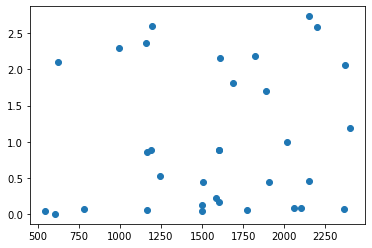

In [30]:
endorsement_vs_mp_graph = \
plt.scatter(endorsements_2019_updated['Minutes_played'],endorsements_2019_updated['Value to cost'])

endorsement_vs_mp_graph
plt.show()

In [31]:
#Create function to automate the scatter plot
def create_scatter(data, x_col, y_col):
    plt.scatter(data[x_col],data[y_col])
    
    plt.title(x_col + ' vs. ' + y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.show()

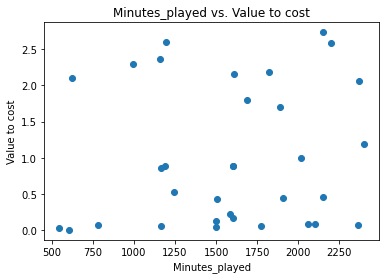

In [32]:
create_scatter(endorsements_2019_updated, 'Minutes_played', 'Value to cost')

In [33]:
endorsements_2019_updated[['Minutes_played','Endorsment (millions)']] = \
endorsements_2019_updated[['Minutes_played','Endorsment (millions)']].\
fillna(endorsements_2019_updated[['Minutes_played','Endorsment (millions)']].mean())

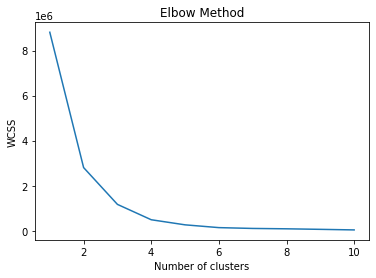

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(endorsements_2019_updated[['Minutes_played','Value to cost']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
#Create function to automate the elbow method
def elbow_method(data, x_col, y_col):
    
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data[[x_col,y_col]])
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

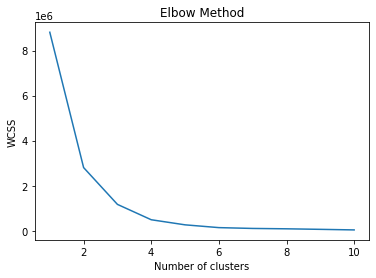

In [36]:
elbow_method(endorsements_2019_updated, 'Minutes_played', 'Value to cost')

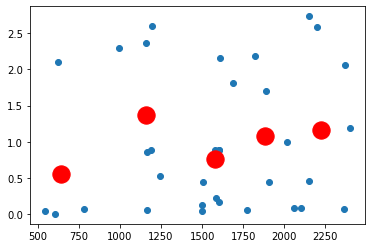

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(endorsements_2019_updated[['Minutes_played','Value to cost']])
plt.scatter(endorsements_2019_updated['Minutes_played'], endorsements_2019_updated['Value to cost'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [38]:
def k_means_cluster_center(data, x_col, y_col,clusters):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(data[[x_col,y_col]])
    plt.scatter(data[x_col], data[y_col])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    plt.title(x_col + ' vs. ' + y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

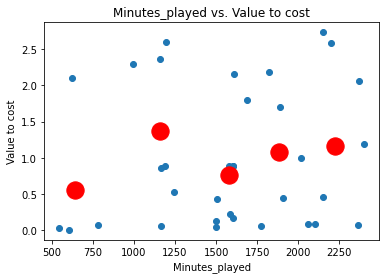

In [39]:
k_means_cluster_center(endorsements_2019_updated, 'Minutes_played', 'Value to cost',5)

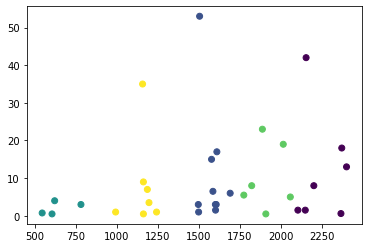

In [40]:
iris = datasets.load_iris()
data = endorsements_2019_updated
x=data[['Minutes_played']]
y=data[['Endorsment (millions)']]
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(data[['Minutes_played','Endorsment (millions)']])
labels = kmeans.predict(data[['Minutes_played','Endorsment (millions)']])

plt.scatter(data[['Minutes_played']], data[['Endorsment (millions)']], c=labels)
plt.show()

In [41]:
def color_clusters(data, x_col, y_col, clusters):
    iris = datasets.load_iris()
    x=data[[x_col]]
    y=data[[y_col]]
    kmeans = KMeans(n_clusters=clusters)
    kmeans = kmeans.fit(data[[x_col,y_col]])
    labels = kmeans.predict(data[[x_col,y_col]])
    
    plt.title(x_col + ' vs. ' + y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.scatter(data[[x_col]], data[[y_col]], c=labels)
    plt.show()

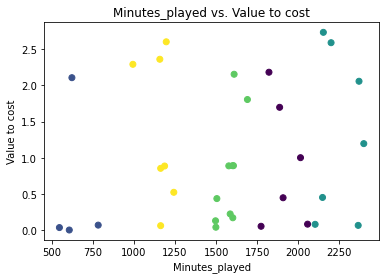

In [42]:
color_clusters(endorsements_2019_updated, 'Minutes_played', 'Value to cost',5)

In [43]:
endorsements_2019_updated[['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']]

,Win_shares,Games,Draft Year,Tenure (Years),Overall Draft Pick
0,5.6,45.0,2003,18,1
1,5.0,35.0,2007,14,2
2,9.0,63.0,2009,12,7
3,2.6,69.0,2003,18,3
4,9.2,70.0,2005,16,4
5,4.0,69.0,2004,17,1
6,7.0,44.0,2009,12,3
7,3.7,65.0,2008,13,4
8,2.0,46.0,2009,12,1
9,7.4,54.0,2011,10,1


In [44]:
endorsements_2019_updated[['Win_shares','Games']] = \
endorsements_2019_updated[['Win_shares','Games']].fillna(endorsements_2019_updated[['Win_shares','Games']].mean())

In [45]:
endorsements_2019_updated[['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']]

,Win_shares,Games,Draft Year,Tenure (Years),Overall Draft Pick
0,5.600000,45.000000,2003,18,1
1,5.000000,35.000000,2007,14,2
2,9.000000,63.000000,2009,12,7
3,2.600000,69.000000,2003,18,3
4,9.200000,70.000000,2005,16,4
5,4.000000,69.000000,2004,17,1
6,7.000000,44.000000,2009,12,3
7,3.700000,65.000000,2008,13,4
8,2.000000,46.000000,2009,12,1
9,7.400000,54.000000,2011,10,1


Win_shares


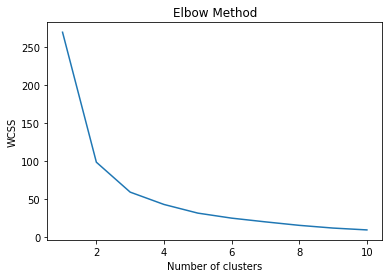

Games


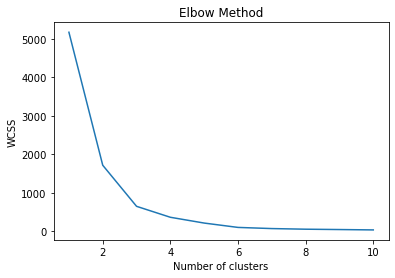

Draft Year


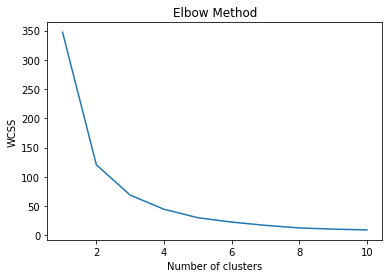

Tenure (Years)


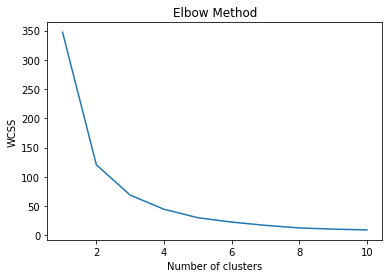

Overall Draft Pick


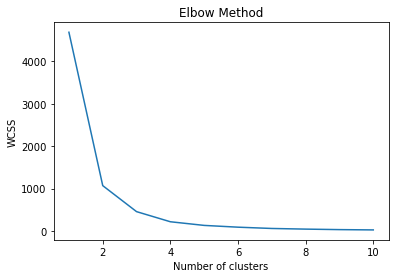

In [46]:
target_features = ['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']

for target_feature in target_features:
    data = endorsements_2019_updated
    print(target_feature)
    y_col = 'Value to cost'
    x_col = target_feature

    elbow_method(data, x_col, y_col)

### Win Shares vs. Number of Sponsorships

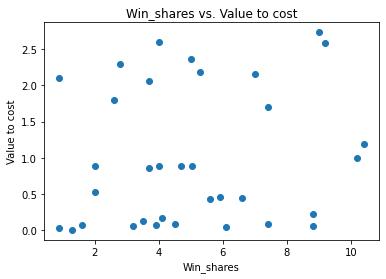

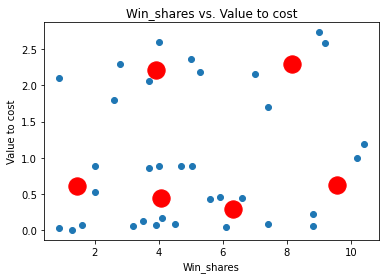

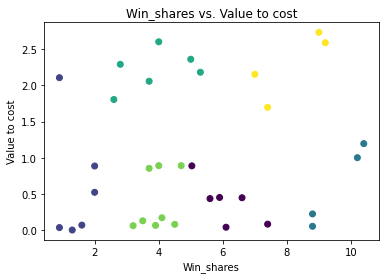

In [47]:
#['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']

data = endorsements_2019_updated
y_col = 'Value to cost'
x_col = 'Win_shares'
clusters = 6

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Games vs. Number of Sponsorships

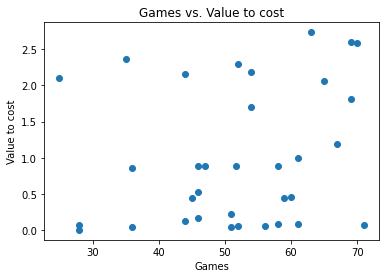

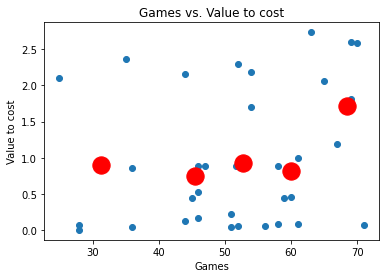

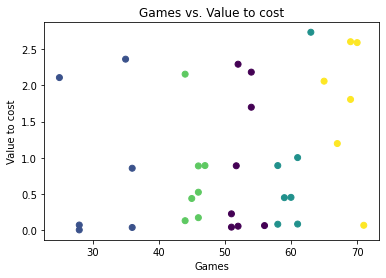

In [48]:
#['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']

data = endorsements_2019_updated
y_col = 'Value to cost'
x_col = 'Games'
clusters = 5

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Draft Year vs. Number of Sponsorships

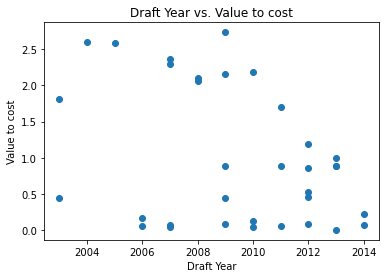

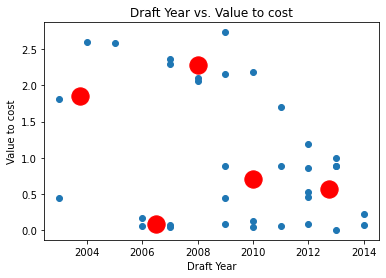

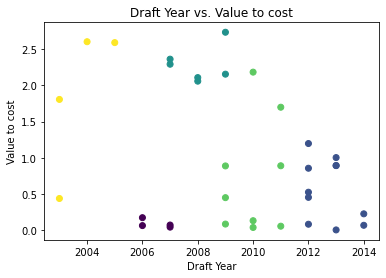

In [49]:
#['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']

data = endorsements_2019_updated
y_col = 'Value to cost'
x_col = 'Draft Year'
clusters = 5

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Tenure (Years) vs. Number of Sponsorships

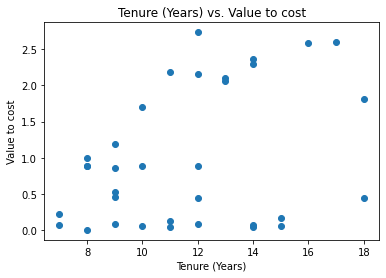

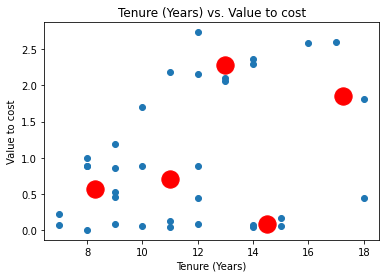

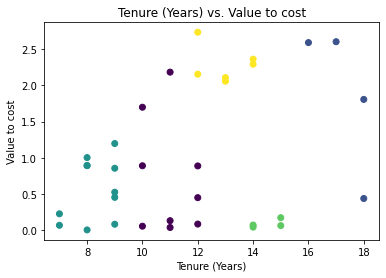

In [50]:
#['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']

data = endorsements_2019_updated
y_col = 'Value to cost'
x_col = 'Tenure (Years)'
clusters = 5

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Overall Draft Pick vs. Number of Sponsorships

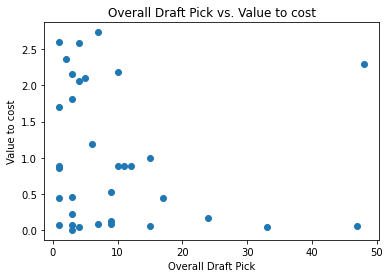

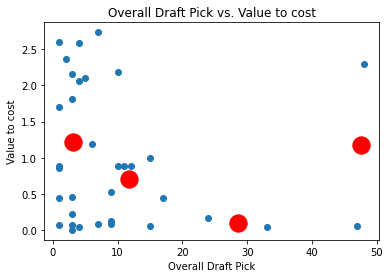

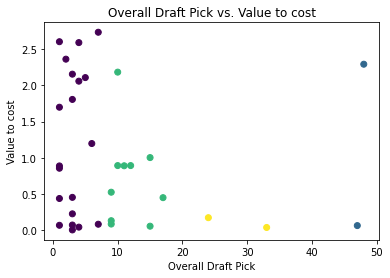

In [51]:
#['Win_shares', 'Games', 'Draft Year', 'Tenure (Years)', 'Overall Draft Pick']

data = endorsements_2019_updated
y_col = 'Value to cost'
x_col = 'Overall Draft Pick'
clusters = 4

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

## 2020-21 Dataset - Sponsorships

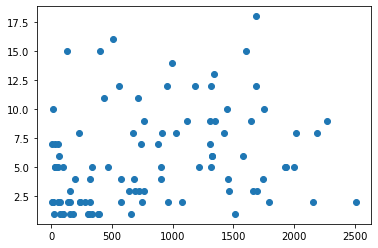

In [52]:
tenure_vs_sponsorships_graph = \
plt.scatter(player_2020_2021_stats_updated['MP'],player_2020_2021_stats_updated['Tenure (Years)'])

tenure_vs_sponsorships_graph
plt.show()

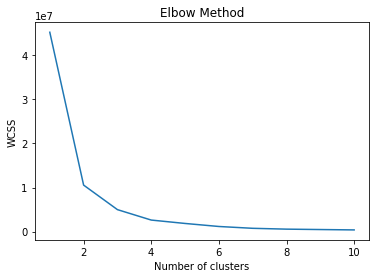

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(player_2020_2021_stats_updated[['MP','Tenure (Years)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

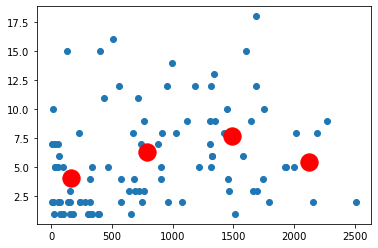

In [54]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(player_2020_2021_stats_updated[['MP','Tenure (Years)']])
plt.scatter(player_2020_2021_stats_updated['MP'], player_2020_2021_stats_updated['Tenure (Years)'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [55]:
kmeans.cluster_centers_

array([[ 789.        ,    6.36      ],
       [ 165.61904762,    4.04761905],
       [1485.44      ,    7.68      ],
       [2123.25      ,    5.5       ]])

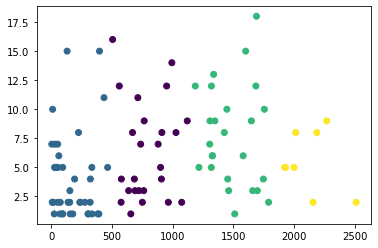

In [56]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


iris = datasets.load_iris()
data = player_2020_2021_stats_updated
x=data[['MP']]
y=data[['Tenure (Years)']]
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(data[['MP','Tenure (Years)']])
labels = kmeans.predict(player_2020_2021_stats_updated[['MP','Tenure (Years)']])

plt.scatter(data[['MP']], data[['Tenure (Years)']], c=labels)
plt.show()

In [57]:
player_2020_2021_stats_updated[['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']]

,Tenure (Years),Draft Round,Overall Pick,2PA,FT
0,5,NaN,NaN,12,0
1,8,1.0,2.0,228,65
2,2,NaN,NaN,3,0
3,1,2.0,36.0,18,3
4,8,1.0,9.0,189,51
...,...,...,...,...,...
95,12,1.0,1.0,206,87
96,12,1.0,1.0,108,43
97,5,NaN,81.0,168,49
98,11,1.0,8.0,62,18


In [58]:
player_2020_2021_stats_updated[['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']].isna().describe()

,Tenure (Years),Draft Round,Overall Pick,2PA,FT
count,100,100,100,100,100
unique,1,2,2,1,1
top,False,False,False,False,False
freq,100,69,70,100,100


In [59]:
player_2020_2021_stats_updated[['Draft Round']] = \
player_2020_2021_stats_updated[['Draft Round']].fillna(3) #fill undrafted players with a 3

In [60]:
player_2020_2021_stats_updated[['Draft Round']].head()

,Draft Round
0,3.0
1,1.0
2,3.0
3,2.0
4,1.0


In [61]:
player_2020_2021_stats_updated[['Overall Pick']] = \
player_2020_2021_stats_updated[['Overall Pick']].fillna(player_2020_2021_stats_updated[['Overall Pick']].max())
#fill undrafted players with the max overall draft pick

In [62]:
player_2020_2021_stats_updated[['Overall Pick']].head()

,Overall Pick
0,81.0
1,2.0
2,81.0
3,36.0
4,9.0


In [63]:
player_2020_2021_stats_updated[['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']].isna().describe()

,Tenure (Years),Draft Round,Overall Pick,2PA,FT
count,100,100,100,100,100
unique,1,1,1,1,1
top,False,False,False,False,False
freq,100,100,100,100,100


In [64]:
player_2020_2021_stats_updated[['Sponsorship']] = \
player_2020_2021_stats_updated[['Sponsorship']].fillna(0)

In [65]:
player_2020_2021_stats_updated[['Sponsorship']].head()

,Sponsorship
0,0.0
1,6.0
2,0.0
3,0.0
4,2.0


Tenure (Years)


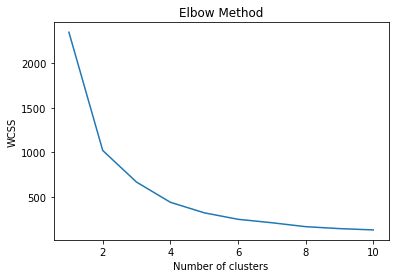

Draft Round


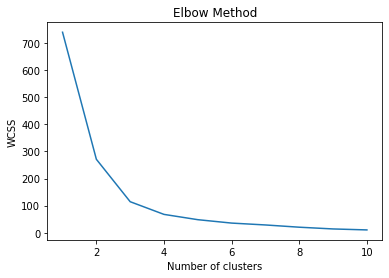

Overall Pick


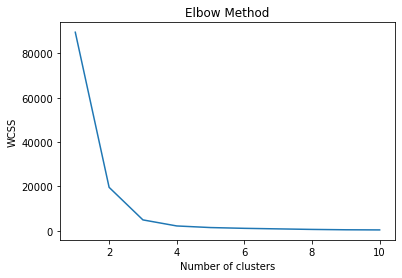

2PA


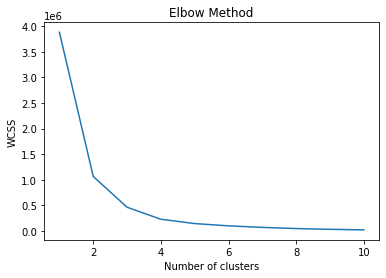

FT


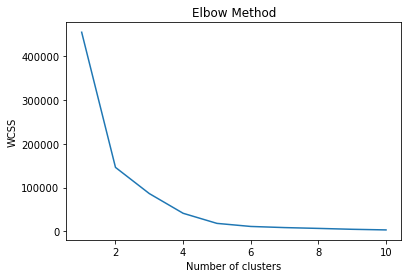

In [66]:
target_features = ['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

for target_feature in target_features:
    data = player_2020_2021_stats_updated
    print(target_feature)
    y_col = 'Sponsorship'
    x_col = target_feature

    elbow_method(data, x_col, y_col)

### Tenure (Years) vs. Number of Sponsorships

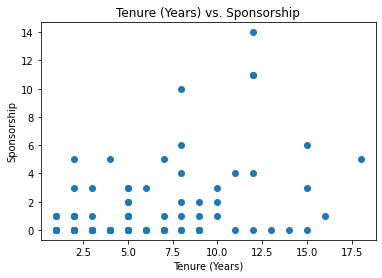

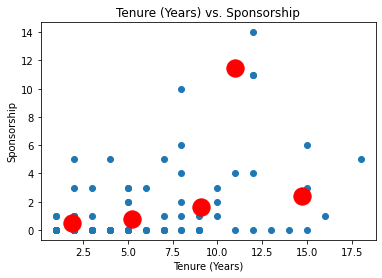

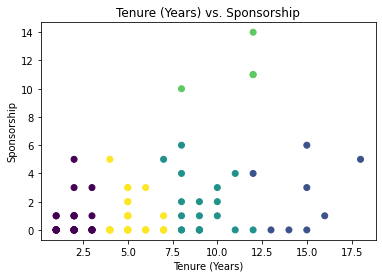

In [67]:
#['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

data = player_2020_2021_stats_updated
y_col = 'Sponsorship'
x_col = 'Tenure (Years)'

clusters = 5

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Draft Round vs. Number of Sponsorships

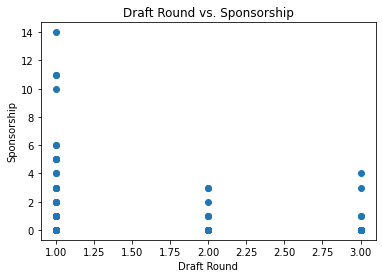

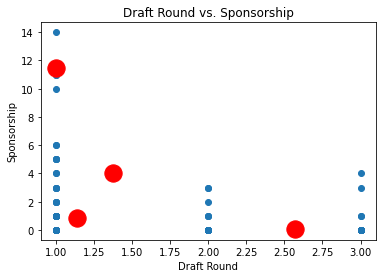

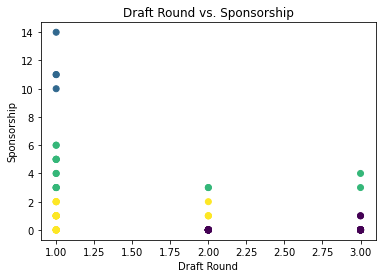

In [68]:
#['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

data = player_2020_2021_stats_updated
y_col = 'Sponsorship'
x_col = 'Draft Round'

clusters = 4

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Overall Pick vs. Number of Sponsorships

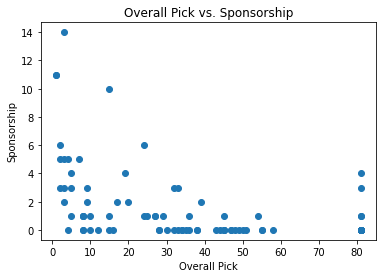

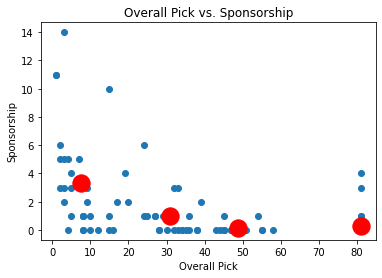

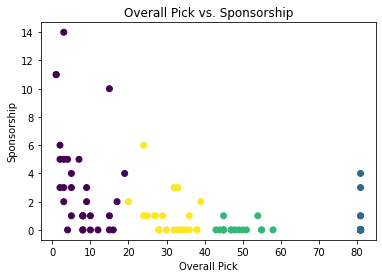

In [69]:
#['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

data = player_2020_2021_stats_updated
y_col = 'Sponsorship'
x_col = 'Overall Pick'

clusters = 4

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### 2 Point Average vs. Number of Sponsorships

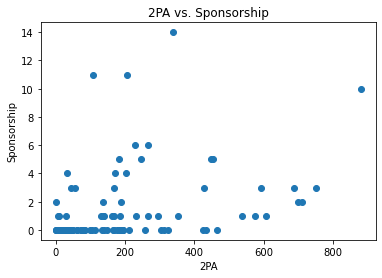

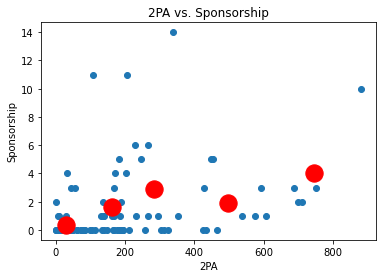

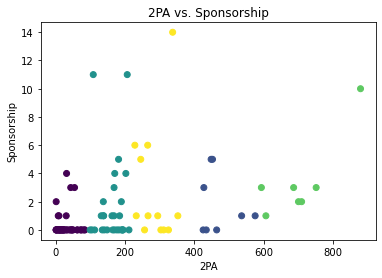

In [70]:
#['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

data = player_2020_2021_stats_updated
y_col = 'Sponsorship'
x_col = '2PA'

clusters = 5

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

### Free Throws vs. Number of Sponsorships

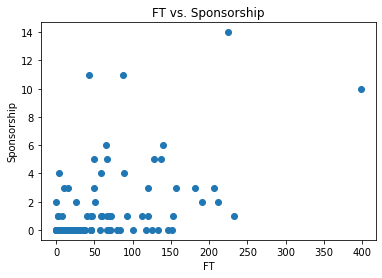

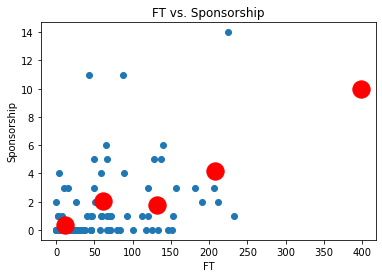

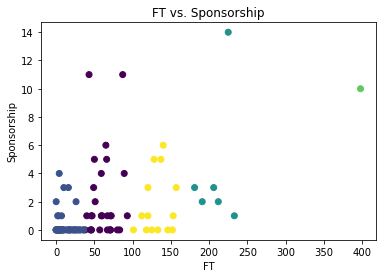

In [71]:
#['Tenure (Years)', 'Draft Round', 'Overall Pick', '2PA', 'FT']

data = player_2020_2021_stats_updated
y_col = 'Sponsorship'
x_col = 'FT'

clusters = 5

create_scatter(data, x_col, y_col)
k_means_cluster_center(data, x_col, y_col, clusters)
color_clusters(data, x_col, y_col, clusters)

# Section 3: Random Forest
By Aissatou Bah

## Random Forest

In [72]:
pd.options.display.max_columns = 70

In [73]:
endorsements = pd.read_csv("data/c_endorsements.csv")
endorsements.head()

,Unnamed: 0,endorsement,twitter_follows,min_cost_post,max_cost_post,avg_cost,value_post,value_cost,team,division,age,win_shares,games,minute_played,field_goal_percent,shooting_percent,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,percent_2P,percent_3P,percent_eFG,percent_FT,Draft Year,Tenure (Years),Draft Round,Overall Draft Pick
0,James Harden,17.0,6.500,27000.0,37500.0,32250.0,69504.0,2.155163,Houston Rockets,Southwest,29.0,15.2,78.0,2867.0,0.442,0.616,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0,0.528,0.368,0.541,0.879,2009,12,1,3
1,Giannis Antetokounmpo,19.0,0.817,9000.0,12500.0,10750.0,10779.0,1.002698,Milwauke Bucks,Central,24.0,14.4,72.0,2358.0,0.578,0.644,159.0,739.0,898.0,424.0,92.0,110.0,268.0,232.0,1994.0,0.641,0.256,0.599,0.729,2013,8,1,15
2,Damian Lillard,13.0,1.800,13500.0,18750.0,16125.0,19299.0,1.196837,Portland Trail Blazers,Northwest,28.0,12.1,80.0,2838.0,0.444,0.588,68.0,303.0,371.0,551.0,88.0,34.0,212.0,148.0,2067.0,0.499,0.369,0.522,0.912,2012,9,1,6
3,Paul George,8.0,2.200,9000.0,12500.0,10750.0,23469.0,2.183163,oklahoma City Thunder,Northwest,28.0,11.9,77.0,2841.0,0.438,583.000,105.0,523.0,628.0,318.0,170.0,34.0,205.0,214.0,2159.0,0.484,0.386,0.529,0.839,2010,11,1,10
4,Kevin Durant,35.0,17.900,67500.0,93750.0,80625.0,190464.0,2.362344,Brooklyn Nets,Atlantic,30.0,11.5,78.0,2702.0,0.521,0.631,33.0,464.0,497.0,457.0,58.0,84.0,225.0,155.0,2027.0,0.587,0.353,0.571,0.885,2007,14,1,2


In [74]:
endorsements.rename({"Unnamed: 0":"players"}, axis = 1, inplace =True)
endorsements.set_index("players", inplace=True)

In [75]:
endorsements.head(2)

,endorsement,twitter_follows,min_cost_post,max_cost_post,avg_cost,value_post,value_cost,team,division,age,win_shares,games,minute_played,field_goal_percent,shooting_percent,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,percent_2P,percent_3P,percent_eFG,percent_FT,Draft Year,Tenure (Years),Draft Round,Overall Draft Pick
players,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,17.0,6.500,27000.0,37500.0,32250.0,69504.0,2.155163,Houston Rockets,Southwest,29.0,15.2,78.0,2867.0,0.442,0.616,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0,0.528,0.368,0.541,0.879,2009,12,1,3
Giannis Antetokounmpo,19.0,0.817,9000.0,12500.0,10750.0,10779.0,1.002698,Milwauke Bucks,Central,24.0,14.4,72.0,2358.0,0.578,0.644,159.0,739.0,898.0,424.0,92.0,110.0,268.0,232.0,1994.0,0.641,0.256,0.599,0.729,2013,8,1,15


We do not have the 3-Point Field Goal Percentage for Dwight Howard. Instead, I will compute this value using the 3-Point Field Goal Percentage from the last 7 years (2014-2021)

In [76]:
dwight_3p = [.25, .6, .143, 0, 0, .5, .357]
avg = lambda x: sum(x) / len(x)
avg_3p =  avg(dwight_3p)
endorsements.fillna(avg_3p, inplace=True)

### Random Forest

Can we predict a player return on investments given the player's background 

In [77]:
# selecting the target feature
roi = np.array(endorsements["value_cost"])
# background information
attributes = endorsements.iloc[:, 9:]
attributes["twitter_follows"] = endorsements["twitter_follows"]
attributes_header = list(attributes.columns)
attributes = np.array(attributes)

In [78]:
# split the data into training and testing sets
train_attributes, test_attributes, train_roi, test_roi = train_test_split(attributes, roi, test_size = 0.2, random_state = 77)

In [79]:
print(len(test_roi))
print(len(train_attributes))

7
27


training sample size is 7 and testing sample size 27 

In [80]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 21)
# Train the model on training data
rf.fit(train_attributes, train_roi)

RandomForestRegressor(n_estimators=1000, random_state=21)

In [81]:
# test the regression model
predictions = rf.predict(test_attributes)

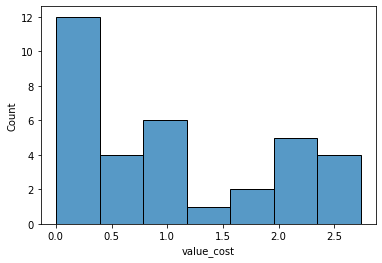

In [82]:
sns.histplot(endorsements["value_cost"])

The values range from 0 to 2.5

In [83]:
# measure the model performance
errors = abs(predictions-test_roi)
# mean absolute error
np.mean(errors)

0.3567245989848574

In [84]:
# Calculate mean absolute percentage error (MAPE)
mape = (errors / test_roi)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
accuracy

94.50001987730454

In [85]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = attributes_header, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
a = graph.write_png('tree.png')

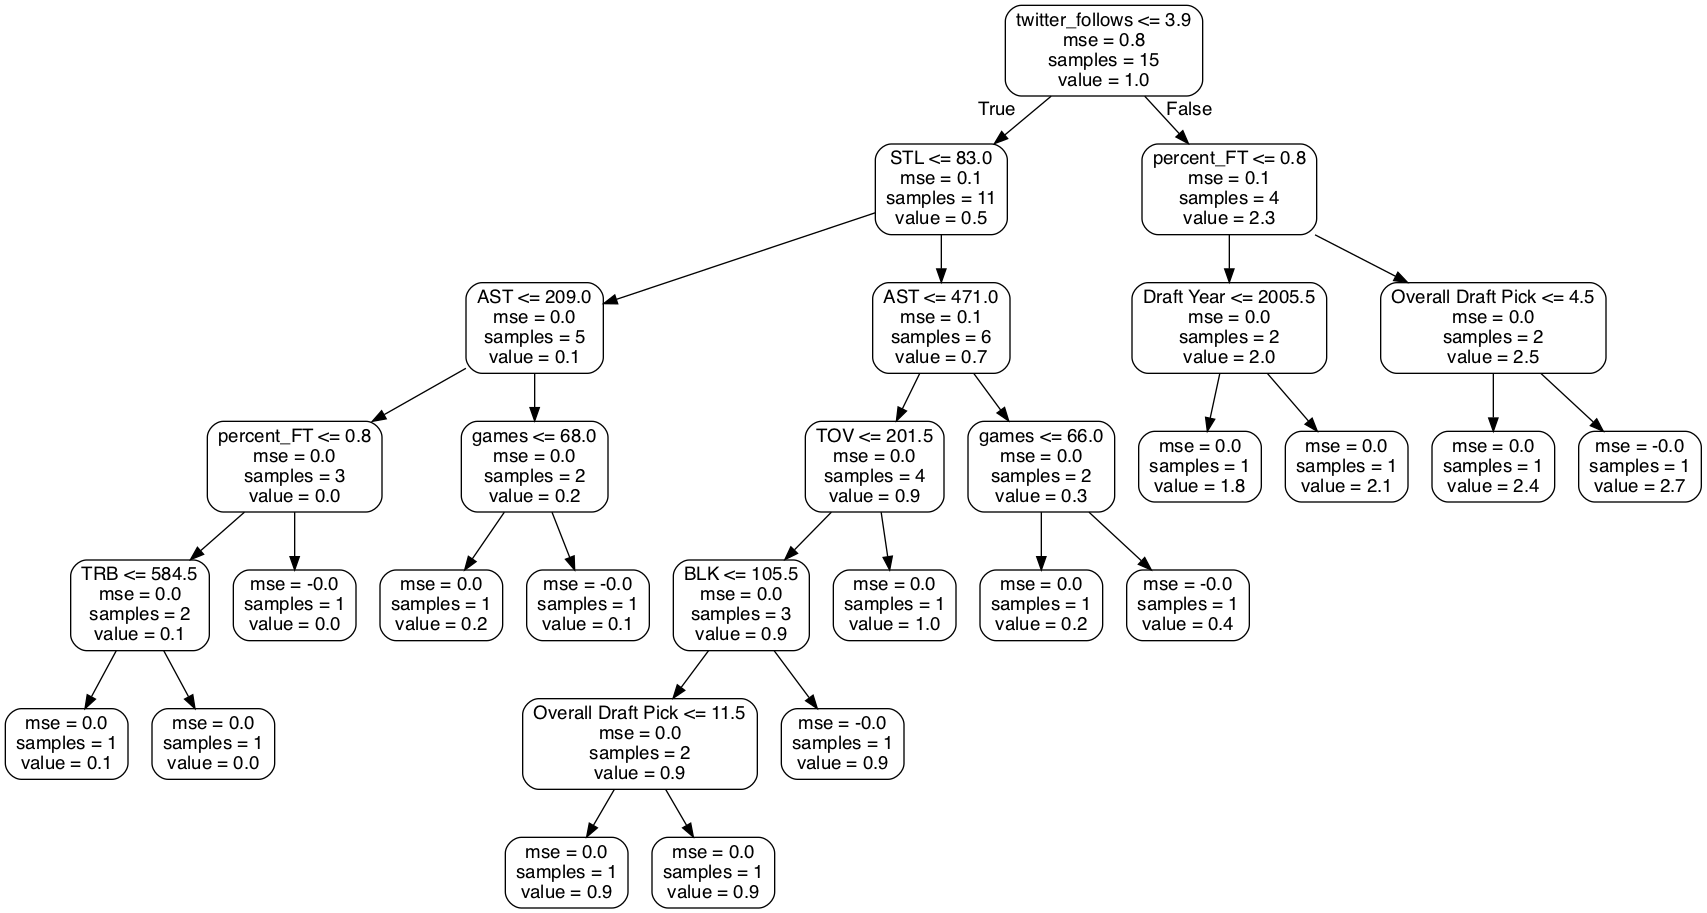

In [86]:
# Display tree
from IPython.display import Image
Image(filename = 'tree.png')

In [87]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(attributes_header, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: twitter_follows      Importance: 0.62
Variable: percent_FT           Importance: 0.05
Variable: shooting_percent     Importance: 0.04
Variable: ORB                  Importance: 0.03
Variable: Overall Draft Pick   Importance: 0.03
Variable: age                  Importance: 0.02
Variable: TOV                  Importance: 0.02
Variable: PTS                  Importance: 0.02
Variable: percent_2P           Importance: 0.02
Variable: percent_eFG          Importance: 0.02
Variable: win_shares           Importance: 0.01
Variable: minute_played        Importance: 0.01
Variable: field_goal_percent   Importance: 0.01
Variable: DRB                  Importance: 0.01
Variable: TRB                  Importance: 0.01
Variable: AST                  Importance: 0.01
Variable: STL                  Importance: 0.01
Variable: BLK                  Importance: 0.01
Variable: PF                   Importance: 0.01
Variable: percent_3P           Importance: 0.01
Variable: Draft Year           Importanc

The number of followers that a player has on twitter is the best indicator for return on investments. The other features seems to be not as important. Instead of looking at the statistics from one year, we should take the average of the first three years for each player. Draft round has no importance at all but then almost all of these players where picked on the first round

### Predicting number of followers on twitter

In [88]:
endorsements.head(2)

,endorsement,twitter_follows,min_cost_post,max_cost_post,avg_cost,value_post,value_cost,team,division,age,win_shares,games,minute_played,field_goal_percent,shooting_percent,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,percent_2P,percent_3P,percent_eFG,percent_FT,Draft Year,Tenure (Years),Draft Round,Overall Draft Pick
players,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,17.0,6.500,27000.0,37500.0,32250.0,69504.0,2.155163,Houston Rockets,Southwest,29.0,15.2,78.0,2867.0,0.442,0.616,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0,0.528,0.368,0.541,0.879,2009,12,1,3
Giannis Antetokounmpo,19.0,0.817,9000.0,12500.0,10750.0,10779.0,1.002698,Milwauke Bucks,Central,24.0,14.4,72.0,2358.0,0.578,0.644,159.0,739.0,898.0,424.0,92.0,110.0,268.0,232.0,1994.0,0.641,0.256,0.599,0.729,2013,8,1,15


In [89]:
# selecting the target feature
twitter_follows = np.array(endorsements["twitter_follows"])
# background information
attributes2 = endorsements.iloc[:, 9:]
attributes2_header = list(attributes2.columns)
attributes2 = np.array(attributes2)

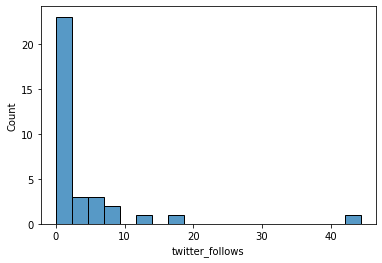

In [90]:
sns.histplot(endorsements["twitter_follows"])

In [91]:
# split the data into training and testing sets
train_attributes2, test_attributes2, train_followers, test_followers = train_test_split(attributes2, twitter_follows, test_size = 0.2, random_state = 77)

In [92]:
print(len(train_attributes2))
print(len(test_followers))

27
7


In [93]:
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 21)
# Train the model on training data
rf2.fit(train_attributes2, train_followers)

RandomForestRegressor(n_estimators=1000, random_state=21)

In [94]:
# test the regression model
predictions2 = rf2.predict(test_attributes2)

In [95]:
# measure the model performance
errors2 = abs(predictions2-test_followers)
# mean absolute error
np.mean(errors2)

4.014476285714266

In [96]:
# Calculate mean absolute percentage error (MAPE)
mape2 = (errors2 / test_followers)

# Calculate and display accuracy
accuracy2 = 100 - np.mean(mape2)
accuracy2

92.67175840884408

In [97]:
# Pull out one tree from the forest
tree = rf2.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = attributes2_header, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
b = graph.write_png('tree.png')

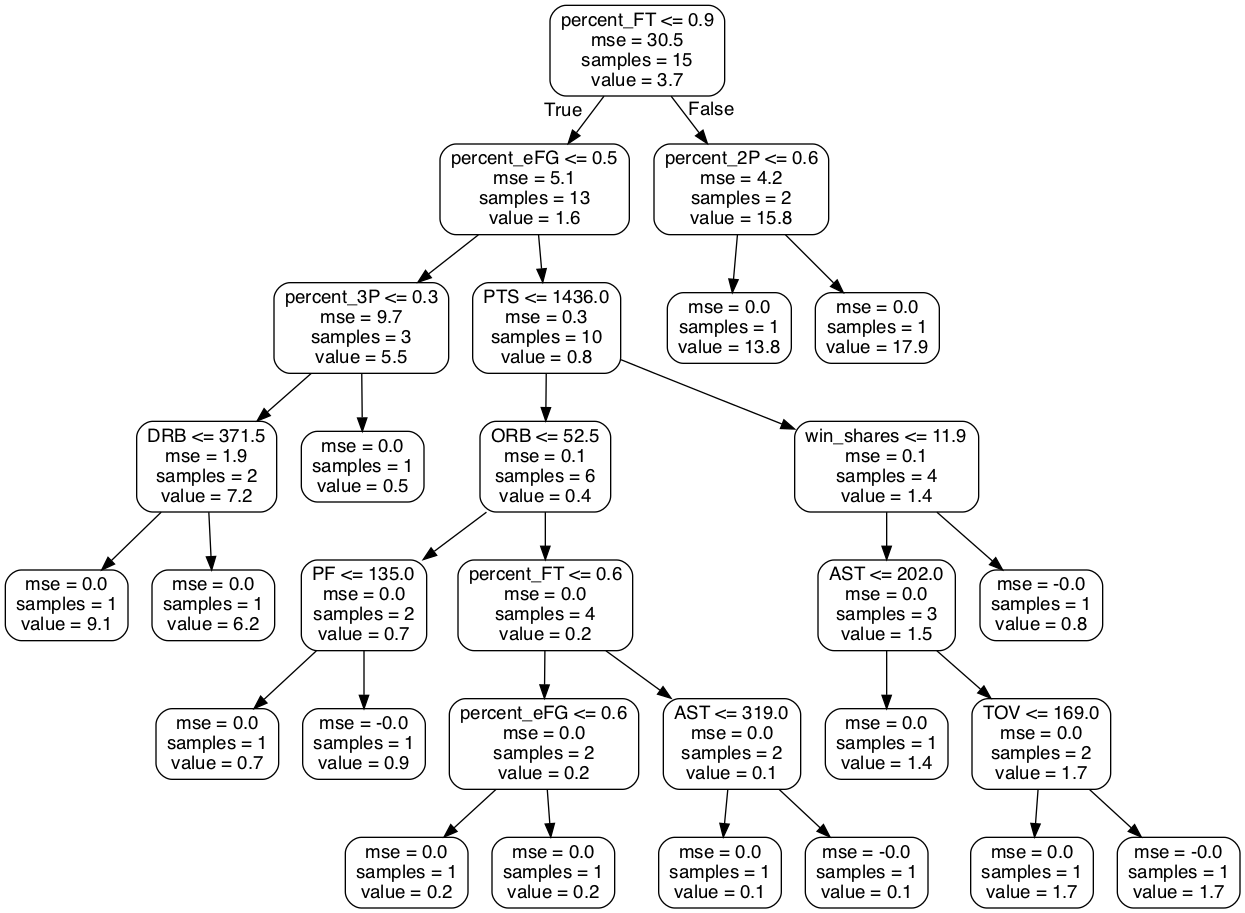

In [98]:
# Display tree
from IPython.display import Image
Image(filename = 'tree.png')

In [99]:
# Get numerical feature importances
importances = list(rf2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(attributes_header, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: percent_FT           Importance: 0.23
Variable: Draft Year           Importance: 0.17
Variable: Tenure (Years)       Importance: 0.16
Variable: ORB                  Importance: 0.06
Variable: age                  Importance: 0.05
Variable: BLK                  Importance: 0.04
Variable: TOV                  Importance: 0.03
Variable: PF                   Importance: 0.03
Variable: Overall Draft Pick   Importance: 0.03
Variable: games                Importance: 0.02
Variable: shooting_percent     Importance: 0.02
Variable: AST                  Importance: 0.02
Variable: STL                  Importance: 0.02
Variable: percent_2P           Importance: 0.02
Variable: win_shares           Importance: 0.01
Variable: minute_played        Importance: 0.01
Variable: field_goal_percent   Importance: 0.01
Variable: DRB                  Importance: 0.01
Variable: TRB                  Importance: 0.01
Variable: PTS                  Importance: 0.01
Variable: percent_3P           Importanc

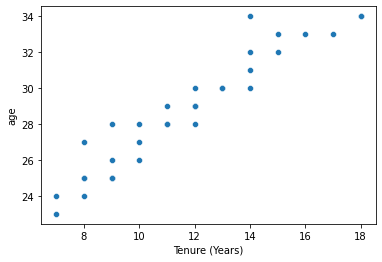

In [100]:
sns.scatterplot(x="Tenure (Years)", y="age", data=endorsements)

### 2020-2021 Datasets

In [101]:
player_stats = pd.read_csv("data/player_2020_2021_count_fg_stats_social_media_csv.csv")
player_stats.set_index("Player", inplace=True)
player_stats.drop("Index", axis= 1, inplace=True)
player_stats.head()

,Sponsorship,Industry,Subindustry,FG%,Team Code,Twitter Followers,Twitter Followers (number),Twitter Posts (Past 30 days),Twitter Interactions (Past 30 days),Twitter Interactions (Past 30 days) Number,Instagram Followers,Instagram Presence (number),Instagram Posts (Past 30 Days),Instagram Interactions (Past 30 Days),Instagram Interactions (Past 30 Days) Number,Facebook Followers,Facebook Followers (number),NBA Draft,Tenure (Years),Draft Round,Overall Pick,Notes,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yogi Ferrell,NaN,NaN,NaN,0.381,CLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,5,NaN,NaN,NaN,PG,27,CLE,2,0,40,8,21,3,9,0.333,5,12,0.417,0.452,0,2,0.000,3,4,7,5,3,1,3,4,19,0.075000,0.100000,0.175000,0.125000,0.075000,0.025000,0.075000,0.100000,0.475000
Victor Oladipo,6.0,6.0,6.0,0.407,HOU,318.68K,318680.0,8.0,0,0.0,NaN,NaN,0.0,0,0.0,411.40K,411400.0,2013,8,1.0,2.0,NaN,SG,28,HOU,20,20,669,155,381,49,153,0.320,106,228,0.465,0.471,65,83,0.783,8,87,95,99,24,10,51,45,424,0.011958,0.130045,0.142003,0.147982,0.035874,0.014948,0.076233,0.067265,0.633782
Tyler Cook,NaN,NaN,NaN,0.333,BRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,NaN,NaN,NaN,PF,23,BRK,4,0,17,1,3,0,0,NaN,1,3,0.333,0.333,0,0,NaN,1,1,2,2,0,0,1,2,2,0.058824,0.058824,0.117647,0.117647,0.000000,0.000000,0.058824,0.117647,0.117647
Tyler Bey,NaN,NaN,NaN,0.318,DAL,4.80k,4800.0,3.0,182,182.0,10.68k,10680.0,0.0,0,0.0,NaN,NaN,2020,1,2.0,36.0,NaN,SF,22,DAL,18,0,71,7,22,1,4,0.250,6,18,0.333,0.341,3,5,0.600,8,11,19,3,0,1,3,6,18,0.112676,0.154930,0.267606,0.042254,0.000000,0.014085,0.042254,0.084507,0.253521
Trey Burke,2.0,2.0,2.0,0.428,DAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8,1.0,9.0,NaN,PG,28,DAL,62,1,911,151,353,58,164,0.354,93,189,0.492,0.510,51,57,0.895,10,44,54,81,36,7,33,64,411,0.010977,0.048299,0.059276,0.088913,0.039517,0.007684,0.036224,0.070252,0.451153


In [102]:
# make copy of player stats datsets
rf_player_stats = player_stats.copy()

In [103]:
# select columns to drop
c_drop = ["Industry", "Subindustry" , "Team Code", "Twitter Followers", "Instagram Followers", "Facebook Followers", "Tm", "FG", "FGA", "3P", "3PA", "2P", "2PA", "FT", "FTA", "ORB","DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Pos"]
rf_player_stats.drop(c_drop, axis = 1, inplace=True)

In [104]:
rf_player_stats.head(2)

,Sponsorship,FG%,Twitter Followers (number),Twitter Posts (Past 30 days),Twitter Interactions (Past 30 days),Twitter Interactions (Past 30 days) Number,Instagram Presence (number),Instagram Posts (Past 30 Days),Instagram Interactions (Past 30 Days),Instagram Interactions (Past 30 Days) Number,Facebook Followers (number),NBA Draft,Tenure (Years),Draft Round,Overall Pick,Notes,Age,G,GS,MP,3P%,2P%,eFG%,FT%,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yogi Ferrell,NaN,0.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,5,NaN,NaN,NaN,27,2,0,40,0.333,0.417,0.452,0.000,0.075000,0.100000,0.175000,0.125000,0.075000,0.025000,0.075000,0.100000,0.475000
Victor Oladipo,6.0,0.407,318680.0,8.0,0,0.0,NaN,0.0,0,0.0,411400.0,2013,8,1.0,2.0,NaN,28,20,20,669,0.320,0.465,0.471,0.783,0.011958,0.130045,0.142003,0.147982,0.035874,0.014948,0.076233,0.067265,0.633782


In [105]:
# select rows that have sponsorship information
r_select = list(rf_player_stats["Sponsorship"].dropna().index)
rf_player_stats= rf_player_stats.loc[r_select]
rf_player_stats.isnull().sum()

Sponsorship                                      0
FG%                                              0
Twitter Followers (number)                       6
Twitter Posts (Past 30 days)                     8
Twitter Interactions (Past 30 days)              8
Twitter Interactions (Past 30 days) Number      19
Instagram Presence (number)                     19
Instagram Posts (Past 30 Days)                  14
Instagram Interactions (Past 30 Days)           14
Instagram Interactions (Past 30 Days) Number    15
Facebook Followers (number)                     33
NBA Draft                                        0
Tenure (Years)                                   0
Draft Round                                      4
Overall Pick                                     3
Notes                                           43
Age                                              0
G                                                0
GS                                               0
MP                             

In [106]:
# drop columns with missing values
c_drop = ["Twitter Posts (Past 30 days)", "Twitter Interactions (Past 30 days)", "Twitter Interactions (Past 30 days) Number", "Instagram Presence (number)", "Instagram Posts (Past 30 Days)", "Instagram Interactions (Past 30 Days)", "Instagram Interactions (Past 30 Days) Number", "Facebook Followers (number)", "Notes"]
rf_player_stats.drop(c_drop, axis =1, inplace=True)

In [107]:
rf_player_stats.isnull().sum()

Sponsorship                   0
FG%                           0
Twitter Followers (number)    6
NBA Draft                     0
Tenure (Years)                0
Draft Round                   4
Overall Pick                  3
Age                           0
G                             0
GS                            0
MP                            0
3P%                           0
2P%                           0
eFG%                          0
FT%                           1
ORB per MP                    0
DRB per MP                    0
TRB per MP                    0
AST per MP                    0
STL per MP                    0
BLK per MP                    0
TOV per MP                    0
PF per MP                     0
PTS per MP                    0
dtype: int64

In [108]:
# fill in missing values for number of twitter followers
rf_player_stats[rf_player_stats["Twitter Followers (number)"].isnull()]

,Sponsorship,FG%,Twitter Followers (number),NBA Draft,Tenure (Years),Draft Round,Overall Pick,Age,G,GS,MP,3P%,2P%,eFG%,FT%,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
Player,,,,,,,,,,,,,,,,,,,,,,,,
Trey Burke,2.0,0.428,NaN,2013,8,1.0,9.0,28,62,1,911,0.354,0.492,0.510,0.895,0.010977,0.048299,0.059276,0.088913,0.039517,0.007684,0.036224,0.070252,0.451153
R.J. Hampton,1.0,0.439,NaN,2020,1,1.0,24.0,19,26,1,655,0.319,0.484,0.482,0.657,0.029008,0.167939,0.196947,0.111450,0.024427,0.012214,0.064122,0.059542,0.442748
Moritz Wagner,1.0,0.454,NaN,2018,3,1.0,25.0,23,45,24,722,0.341,0.529,0.522,0.816,0.037396,0.164820,0.202216,0.069252,0.036011,0.024931,0.059557,0.149584,0.429363
Juan Hernangómez,1.0,0.435,NaN,2016,5,1.0,15.0,25,52,6,900,0.327,0.573,0.527,0.619,0.050000,0.177778,0.227778,0.038889,0.021111,0.007778,0.030000,0.057778,0.416667
Jeff Teague,4.0,0.433,NaN,2009,12,1.0,19.0,32,55,7,950,0.439,0.431,0.496,0.848,0.015789,0.076842,0.092632,0.138947,0.035789,0.012632,0.067368,0.058947,0.390526
Iman Shumpert,2.0,0.250,NaN,2011,10,1.0,17.0,30,2,0,11,0.000,1.000,0.250,NaN,0.090909,0.000000,0.090909,0.000000,0.090909,0.000000,0.090909,0.000000,0.181818


In [109]:
# fill in missing values
rf_player_stats["Twitter Followers (number)"]["Trey Burke"] = 163400
rf_player_stats["Twitter Followers (number)"]["R.J. Hampton"] = 67600
rf_player_stats["Twitter Followers (number)"]["Moritz Wagner"] = 62500
rf_player_stats["Twitter Followers (number)"]["Juan Hernangómez"] = 42300
rf_player_stats["Twitter Followers (number)"]["Jeff Teague"] = 84100
rf_player_stats["Twitter Followers (number)"]["Iman Shumpert"] = 659900

<ipython-input-109-43a9c27d4ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_player_stats["Twitter Followers (number)"]["Trey Burke"] = 163400
<ipython-input-109-43a9c27d4ce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_player_stats["Twitter Followers (number)"]["R.J. Hampton"] = 67600
<ipython-input-109-43a9c27d4ce0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_player_stats["Twitter Followers (number)"]["Moritz 

In [110]:
# rows with missing value for draft round
rf_player_stats[rf_player_stats["Draft Round"].isnull()]

,Sponsorship,FG%,Twitter Followers (number),NBA Draft,Tenure (Years),Draft Round,Overall Pick,Age,G,GS,MP,3P%,2P%,eFG%,FT%,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
Player,,,,,,,,,,,,,,,,,,,,,,,,
Matthew Dellavedova,4.0,0.250,179310.0,2013,8,NaN,NaN,30,13,1,224,0.160,0.323,0.286,1.000,0.026786,0.080357,0.107143,0.258929,0.017857,0.004464,0.026786,0.093750,0.160714
Jontay Porter,1.0,0.533,124050.0,2019,2,NaN,NaN,21,11,0,54,0.375,0.714,0.633,0.600,0.074074,0.185185,0.259259,0.018519,0.055556,0.018519,0.129630,0.222222,0.407407
Derrick Jones Jr.,1.0,0.484,30500.0,2016,5,NaN,NaN,23,58,43,1318,0.316,0.619,0.554,0.648,0.058422,0.097117,0.155539,0.035660,0.028073,0.040971,0.024279,0.096358,0.300455
Alex Caruso,3.0,0.436,274910.0,2016,5,NaN,81.0,26,58,6,1216,0.401,0.464,0.526,0.645,0.025493,0.114309,0.139803,0.131579,0.052632,0.012336,0.062500,0.088816,0.304276


In [111]:
# rows with missing value for overall pick
rf_player_stats[rf_player_stats["Overall Pick"].isnull()]

,Sponsorship,FG%,Twitter Followers (number),NBA Draft,Tenure (Years),Draft Round,Overall Pick,Age,G,GS,MP,3P%,2P%,eFG%,FT%,ORB per MP,DRB per MP,TRB per MP,AST per MP,STL per MP,BLK per MP,TOV per MP,PF per MP,PTS per MP
Player,,,,,,,,,,,,,,,,,,,,,,,,
Matthew Dellavedova,4.0,0.250,179310.0,2013,8,NaN,NaN,30,13,1,224,0.160,0.323,0.286,1.000,0.026786,0.080357,0.107143,0.258929,0.017857,0.004464,0.026786,0.093750,0.160714
Jontay Porter,1.0,0.533,124050.0,2019,2,NaN,NaN,21,11,0,54,0.375,0.714,0.633,0.600,0.074074,0.185185,0.259259,0.018519,0.055556,0.018519,0.129630,0.222222,0.407407
Derrick Jones Jr.,1.0,0.484,30500.0,2016,5,NaN,NaN,23,58,43,1318,0.316,0.619,0.554,0.648,0.058422,0.097117,0.155539,0.035660,0.028073,0.040971,0.024279,0.096358,0.300455


In [112]:
# Remove players who is missing draft round and overall pick
c_drop = ["Matthew Dellavedova", "Jontay Porter", "Derrick Jones Jr.", "Alex Caruso", "Iman Shumpert"]
rf_player_stats.drop(c_drop, inplace=True)

In [113]:
rf_player_stats.isnull().sum()

Sponsorship                   0
FG%                           0
Twitter Followers (number)    0
NBA Draft                     0
Tenure (Years)                0
Draft Round                   0
Overall Pick                  0
Age                           0
G                             0
GS                            0
MP                            0
3P%                           0
2P%                           0
eFG%                          0
FT%                           0
ORB per MP                    0
DRB per MP                    0
TRB per MP                    0
AST per MP                    0
STL per MP                    0
BLK per MP                    0
TOV per MP                    0
PF per MP                     0
PTS per MP                    0
dtype: int64

In [114]:
# Target variables: number of sponsorship
number_sponsorship = rf_player_stats.groupby("Player")["Sponsorship"].count()

In [115]:
number_sponsorship

Player
Aaron Gordon             1
Blake Griffin            4
Bogdan Bogdanović        1
Cam Reddish              1
Caris LeVert             1
Carmelo Anthony          1
Cassius Stanley          1
Coby White               1
Cory Joseph              1
Darius Garland           1
DeMarcus Cousins         1
Giannis Antetokounmpo    1
Jalen Brunson            1
James Harden             1
Jaxson Hayes             1
Jaylen Brown             1
Jeff Teague              1
Jonas Valančiūnas        1
Juan Hernangómez         1
Kevin Knox               1
Khris Middleton          1
Kyle Lowry               1
LaMarcus Aldridge        1
Lonzo Ball               1
Lou Williams             1
Malcolm Brogdon          1
Marquese Chriss          1
Montrezl Harrell         1
Moritz Wagner            1
R.J. Hampton             1
RJ Barrett               1
Rudy Gobert              1
Terrence Ross            1
Trey Burke               1
Victor Oladipo           1
Name: Sponsorship, dtype: int64

### Random Forest

Can we predict the number of sponsorship that a player has based on field stats

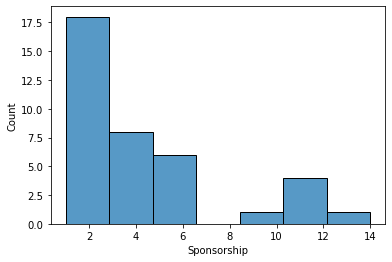

In [116]:
# Histogram of number of sponsorship of players
sns.histplot(rf_player_stats["Sponsorship"])

In [117]:
# target variable
sponsorship_count = np.array(rf_player_stats["Sponsorship"])
# Predictions variables
features = rf_player_stats.drop("Sponsorship", axis = 1)
features_names = list(features.columns)
features = np.array(features)

In [118]:
# Split the data into training and testing sets
train_features3, test_features3, train_count, test_count = train_test_split(features, sponsorship_count, test_size = 0.25, random_state = 77)

In [119]:
print(len(train_features3))
print(len(test_count))

28
10


In [120]:
# Instantiate model with 1000 decision trees
rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 21)
# Train the model on training data
rf3.fit(train_features3, train_count)

RandomForestRegressor(n_estimators=1000, random_state=21)

In [121]:
# test the regression model
predictions3 = rf3.predict(test_features3)

In [122]:
# measure the model performance
errors3 = abs(predictions3-test_count)
# mean absolute error
np.mean(errors3)

1.5493000000000001

In [123]:
# Calculate mean absolute percentage error (MAPE)
mape3 = (errors3 / test_count)

# Calculate and display accuracy
accuracy3 = 100 - np.mean(mape3)
accuracy3

98.8999

In [124]:
# Pull out one tree from the forest
tree = rf3.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features_names, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
c = graph.write_png('tree.png')

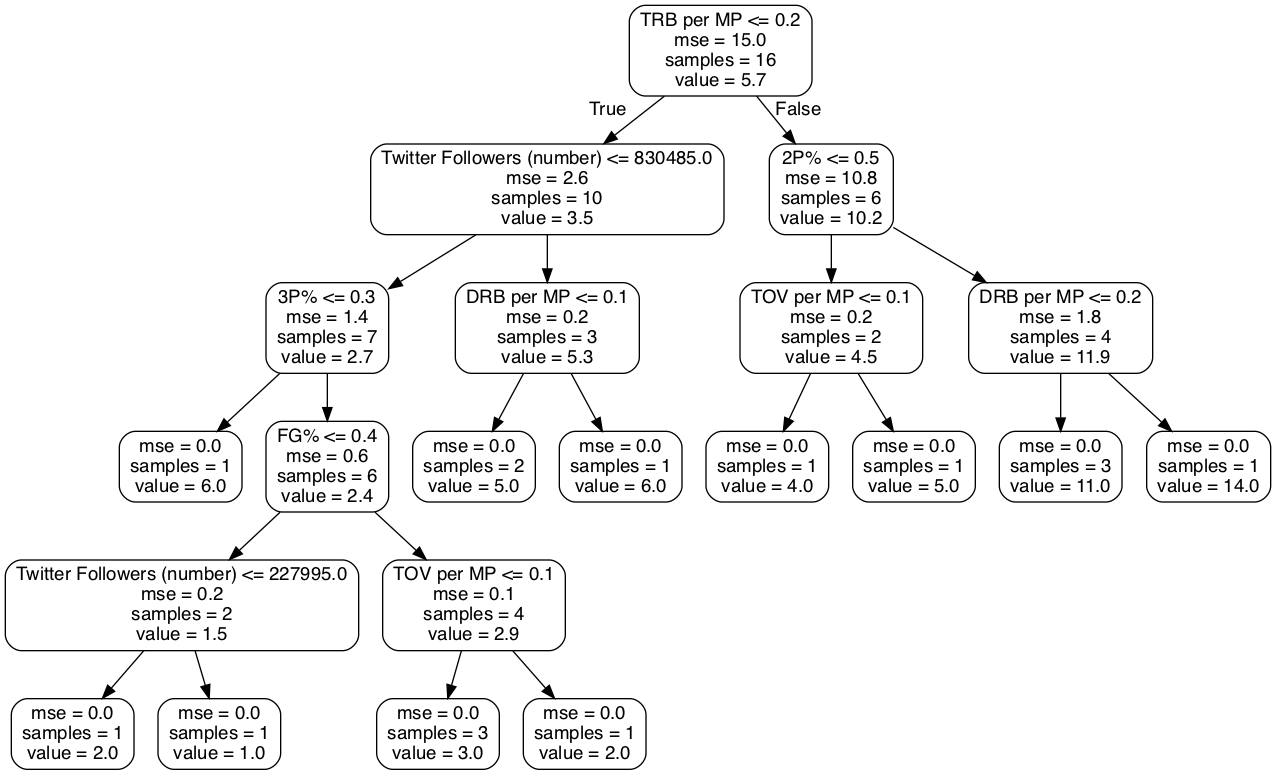

In [125]:
# Display tree
from IPython.display import Image
Image(filename = 'tree.png')

In [126]:
# Get numerical feature importances
importances = list(rf3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Twitter Followers (number) Importance: 0.7
Variable: Overall Pick         Importance: 0.1
Variable: FG%                  Importance: 0.02
Variable: AST per MP           Importance: 0.02
Variable: TOV per MP           Importance: 0.02
Variable: NBA Draft            Importance: 0.01
Variable: Tenure (Years)       Importance: 0.01
Variable: Age                  Importance: 0.01
Variable: G                    Importance: 0.01
Variable: GS                   Importance: 0.01
Variable: MP                   Importance: 0.01
Variable: 3P%                  Importance: 0.01
Variable: 2P%                  Importance: 0.01
Variable: eFG%                 Importance: 0.01
Variable: FT%                  Importance: 0.01
Variable: ORB per MP           Importance: 0.01
Variable: DRB per MP           Importance: 0.01
Variable: TRB per MP           Importance: 0.01
Variable: PF per MP            Importance: 0.01
Variable: PTS per MP           Importance: 0.01
Variable: Draft Round          Impor